In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the 2023 CSV file
file_path_2023 = 'Mean_SST_Values_2023.csv'
data_2023 = pd.read_csv(file_path_2023)

# Load the 2024 CSV file
file_path_2024 = 'Mean_SST_Values_2024.csv'
data_2024 = pd.read_csv(file_path_2024)

In [3]:
# Convert the 'date' column to datetime format for both datasets
data_2023['date'] = pd.to_datetime(data_2023['date'], format='%Y-%m-%d')
data_2024['date'] = pd.to_datetime(data_2024['date'], format='%Y-%m-%d')

# Extract the month and day for both datasets
data_2023['month'] = data_2023['date'].dt.month
data_2023['day'] = data_2023['date'].dt.day

data_2024['month'] = data_2024['date'].dt.month
data_2024['day'] = data_2024['date'].dt.day

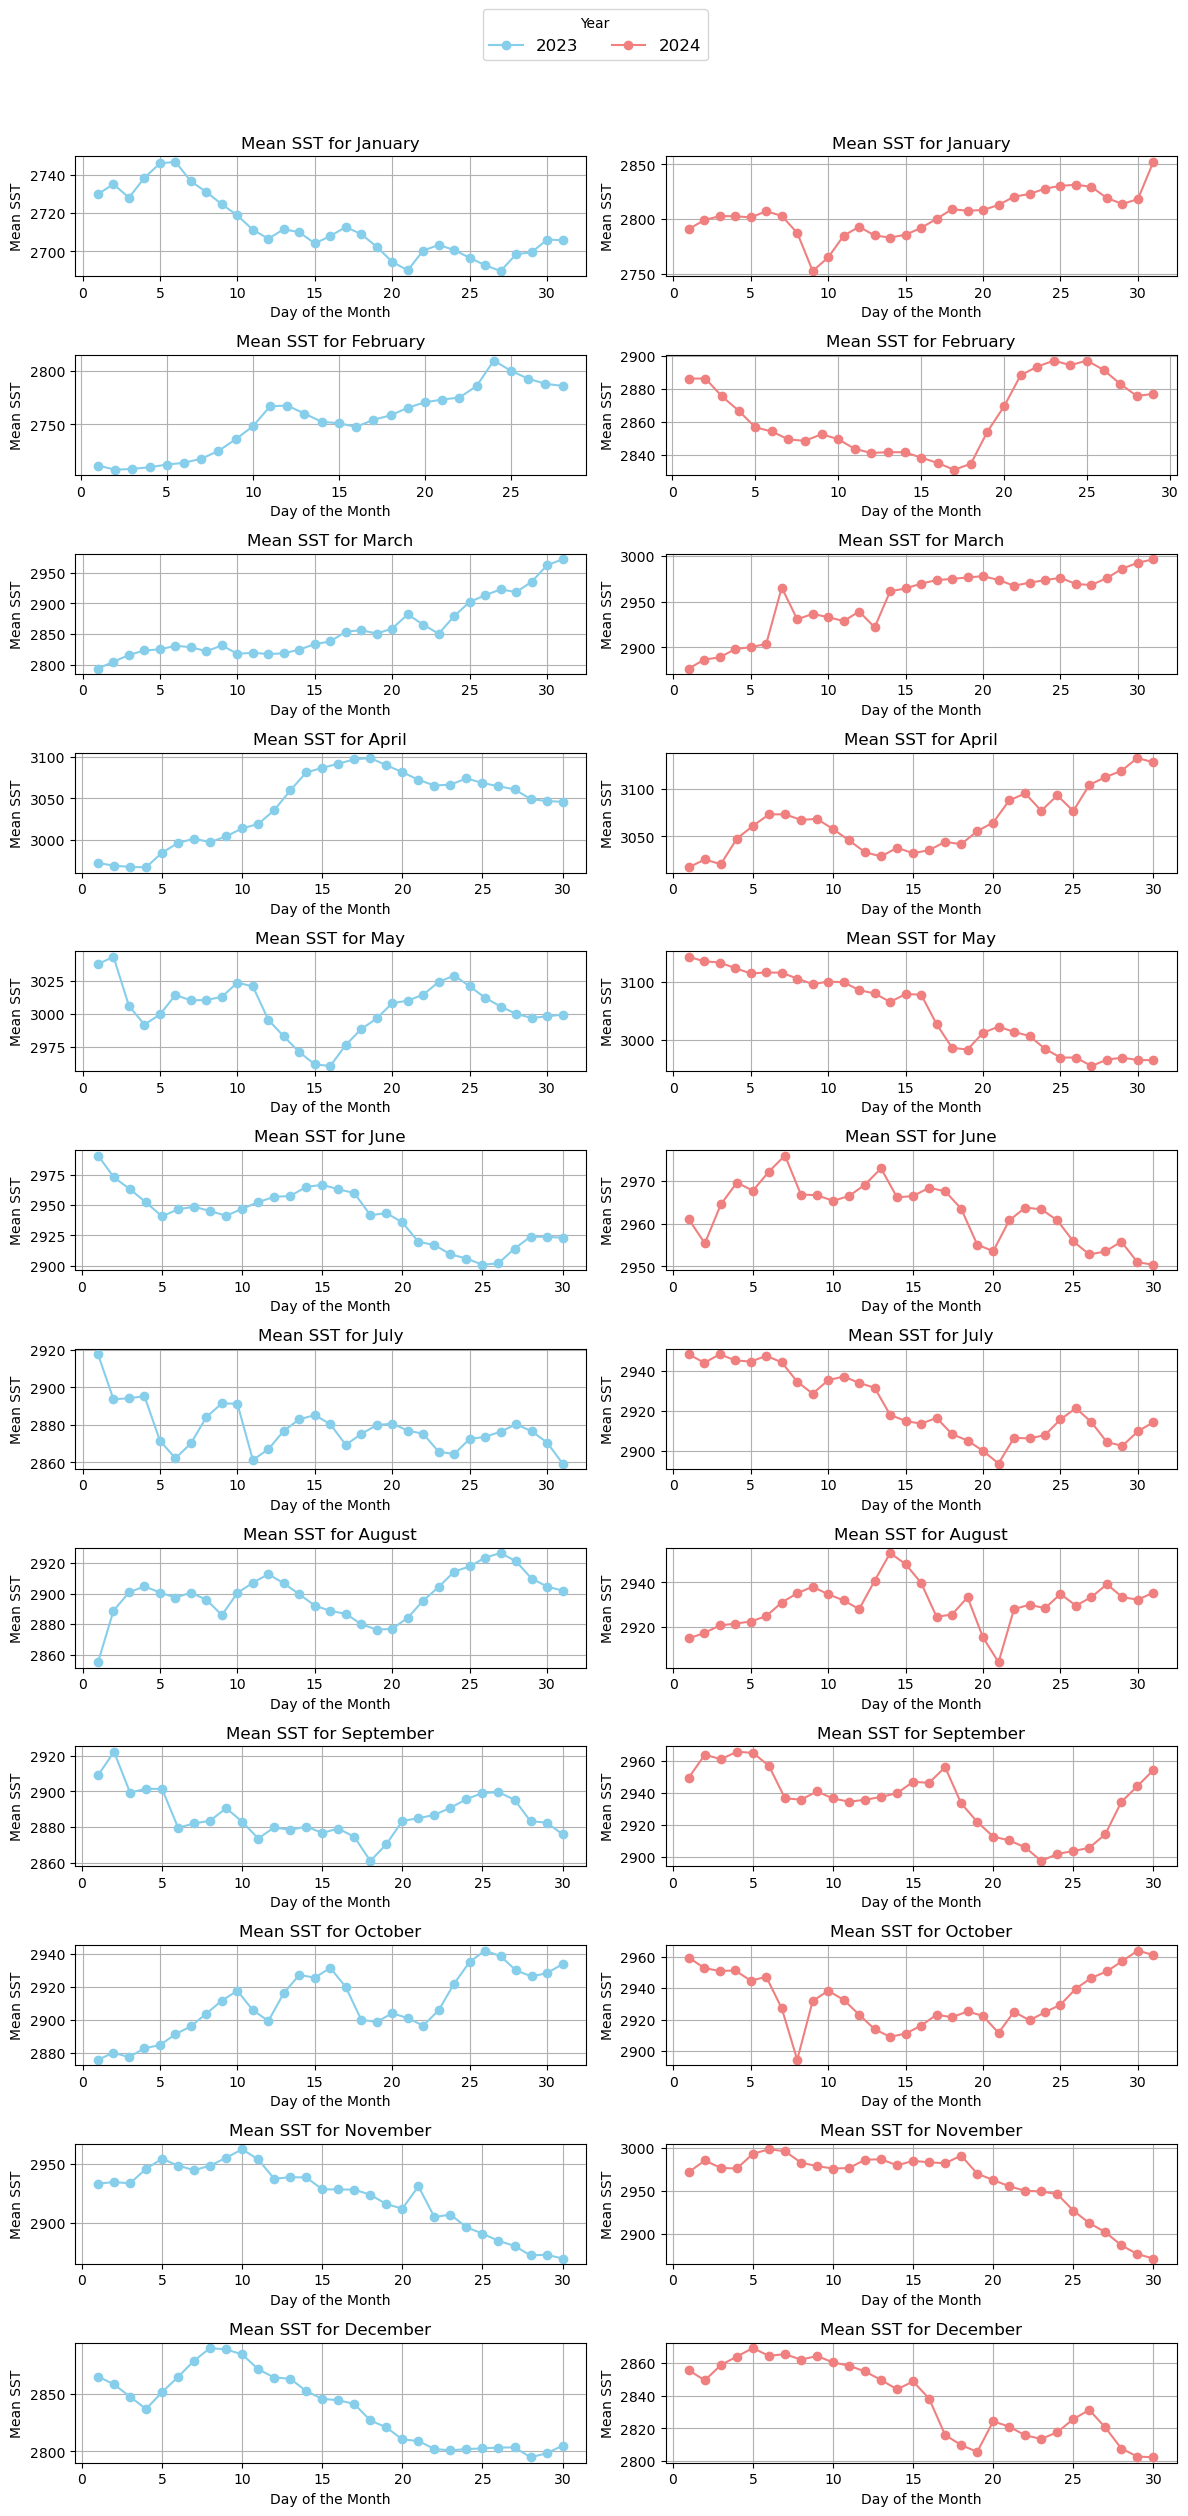

In [10]:
# Create the figure and subplots for both 2023 and 2024 (2 columns and 6 rows for each year)
fig, axes = plt.subplots(12, 2, figsize=(12, 24))

# Flatten the axes array for easier iteration
axes_2023 = axes[:12, 0]  # First column for 2023
axes_2024 = axes[:12, 1]  # Second column for 2024

# Plot for 2023
for i in range(1, 13):
    monthly_data_2023 = data_2023[data_2023['month'] == i]
    daily_mean_sst_2023 = monthly_data_2023.groupby('day')['mean_sst'].mean()
    axes_2023[i-1].plot(daily_mean_sst_2023.index, daily_mean_sst_2023.values, marker='o', linestyle='-', color='skyblue', markersize=6)
    axes_2023[i-1].set_title(f'Mean SST for {pd.to_datetime(f"2023-{i}-01").strftime("%B")}', fontsize=12)
    axes_2023[i-1].set_xlabel('Day of the Month', fontsize=10)
    axes_2023[i-1].set_ylabel('Mean SST', fontsize=10)
    axes_2023[i-1].grid(True)

# Plot for 2024
for i in range(1, 13):
    monthly_data_2024 = data_2024[data_2024['month'] == i]
    daily_mean_sst_2024 = monthly_data_2024.groupby('day')['mean_sst'].mean()
    axes_2024[i-1].plot(daily_mean_sst_2024.index, daily_mean_sst_2024.values, marker='o', linestyle='-', color='lightcoral', markersize=6)
    axes_2024[i-1].set_title(f'Mean SST for {pd.to_datetime(f"2024-{i}-01").strftime("%B")}', fontsize=12)
    axes_2024[i-1].set_xlabel('Day of the Month', fontsize=10)
    axes_2024[i-1].set_ylabel('Mean SST', fontsize=10)
    axes_2024[i-1].grid(True)

# Add a legend to identify years, positioned above the plots
fig.legend(labels=['2023', '2024'], loc='upper center', ncol=2, fontsize=12, title="Year", bbox_to_anchor=(0.5, 1.05))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()